In [1]:
from skimage import segmentation, util, color, feature
from skimage.feature import local_binary_pattern as LBP
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(424, 640, 4)


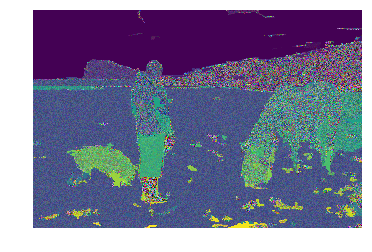

In [12]:
def _generate_segments(im_orig, scale=1.0, sigma=0.8, min_size=50):
    """
        merge Felzenswalb method mask as 4th channel of original image
    """
    scale=300
    sigma=0.90
    min_size=50
    # felzenszwalb method
    im_mask = segmentation.felzenszwalb(
        util.img_as_float(im_orig), scale=scale, sigma=sigma, min_size=min_size)
    
    # merge mask channel to the image as a 4th channel
    im_mask_ = np.zeros(im_orig.shape[:2])[:, :, np.newaxis]  # (424, 640, 1)
    plt.imshow(im_mask)
#     img.set_cmap('hot')
    plt.axis('off')
    im_orig = np.append(im_orig, im_mask_, axis=2)  # shape(424, 640, 4)
    im_orig[:, :, 3] = im_mask
    
    print(im_orig.shape)
    return im_orig

img = io.imread("person.jpg")
img2=_generate_segments(img)
img2*=255/np.max(img2)
# print(img2)
# plt.imshow(img)
plt.imshow(img2)

(271360,)


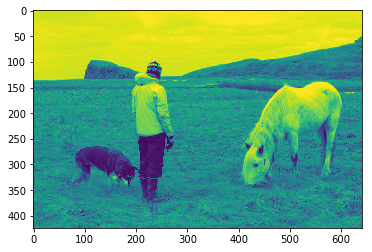

In [36]:
img = io.imread("person.jpg")
imgshow = img[:,:,2]
plt.imshow(imgshow)
imgshow = imgshow.ravel()
print(imgshow.shape)

(array([  2477.,   3917.,   2144.,   1459.,   1467.,   2170.,   2844.,
          4809.,   7719.,  12369.,  20251.,  25769.,  32485.,  32330.,
         20350.,   7983.,   3064.,   2965.,   3119.,   3745.,   4048.,
          2678.,   2471.,  39858.,  28869.]),
 array([   0. ,   10.2,   20.4,   30.6,   40.8,   51. ,   61.2,   71.4,
          81.6,   91.8,  102. ,  112.2,  122.4,  132.6,  142.8,  153. ,
         163.2,  173.4,  183.6,  193.8,  204. ,  214.2,  224.4,  234.6,
         244.8,  255. ]),
 <a list of 25 Patch objects>)

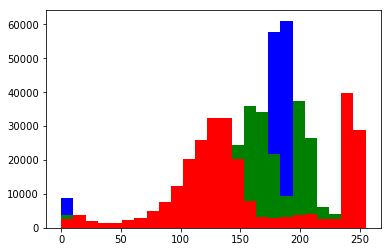

In [41]:
plt.hist(img[:,:,0].ravel(), bins=25, range=(0, 255), color='b')
plt.hist(img[:,:,1].ravel(), bins=25, range=(0, 255), color='g')
plt.hist(img[:,:,2].ravel(), bins=25, range=(0, 255),color='r')

[[ 1.  1.  5. ...,  5.  5.  0.]
 [ 3.  5.  5. ...,  5.  5.  9.]
 [ 3.  5.  4. ...,  8.  8.  1.]
 ..., 
 [ 0.  8.  7. ...,  1.  0.  3.]
 [ 5.  0.  9. ...,  8.  9.  4.]
 [ 1.  4.  5. ...,  9.  0.  1.]]


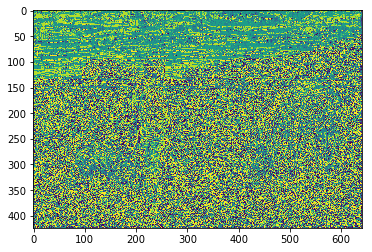

In [43]:
img = io.imread("person.jpg")
img0 = img[:,:,0]
img1 = img[:,:,1]
img2 = img[:,:,2]

METHOD = 'uniform'
radius = 1
n_points = 8 * radius

imgshow_ = LBP(imgshow, n_points, radius, METHOD)

print(imgshow_)
plt.imshow(imgshow_)